# 决策树

决策树可以看所一个if-else的集合，将决策树的根节点到叶节点的每一条路径构建成规则  
具有可解释性

在决策数生成过程中主要包含特征选择，树的生成，剪枝三部分

### 特征选择
熵表示随机变量不确定性的度量，设X是一个有限个数的离散随机变量，概率分布：
$$P(X=x_i)=p_i$$  
随机变量X的熵定义为：
$$H(X)=-\sum_{i=1}^n p_ilogp_i$$  
熵越大，不确定越大  
条件熵$H(Y|X)$表示在已知随机变量X的条件下随机变量Y的不确定性
$$H(Y|X)=\sum_{i=1}^n p_iH(Y|X=x_i)$$  
这里$p_i=P(X=x_i)$

``信息增益``表示得知特征X的信息而使得类Y的信息的不确定减少的程度  
$$g(D,A) = H(D)-H(D|A)$$  
其中，D为数据集，A为特征

``信息增益比`` 
$$g_R(D,A) = \frac{g(D,A)}{H_A(D)}$$  
其中，n是特征A取值的个数
$$H_A(D)=-\sum_{i=1}^n\frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|}$$

``基尼系数`` 分类问题中，假设有K个类，样本点属于第k类的概率为$p_k$，则概率分布的基尼系数定义为  
$$Gini(p)=\sum_{k=1}^K p_k(1-p_k)=1-\sum_{k=1}^K p_k^2$$

对于二分类问题  
$$Gini(p)=2p(1-p)$$

对于给定样本集合D，其基尼系数  
$$Gini(D)=1-\sum_{k=1}^K(\frac{|C_k|}{|D|})^2$$  

集合D根据特征A取值分成D1,D2两部分  
$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)$$

**算法**  
1.计算数据集D经验熵$H(D)$  
$$H(D)=-\sum_{k=1}^K\frac{|C_k|}{|D|}log_2\frac{|C_k|}{|D|}$$
其中，$|D|$表示数据集数量

2.计算特征A对数据集D的经验条件熵$H(D|A)$
$$H(D|A)=\sum_{i=1}^{n} \frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^{n} \frac{|D_i|}{|D|}\sum_{k=1}^K\frac{|C_{ik}|}{|D_i|}log_2\frac{|C_{ik}|}{|D_i|}$$

3.计算信息增益 
$$g(D,A) = H(D)-H(D|A)$$ 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
# 书上的数据集 表5.1
data = [['青年', '否', '否', '一般', '否'],
        ['青年', '否', '否', '好', '否'],
        ['青年', '是', '否', '好', '是'],
        ['青年', '是', '是', '一般', '是'],
        ['青年', '否', '否', '一般', '否'],
        ['中年', '否', '否', '一般', '否'],
        ['中年', '否', '否', '好', '否'],
        ['中年', '是', '是', '好', '是'],
        ['中年', '否', '是', '非常好', '是'],
        ['中年', '否', '是', '非常好', '是'],
        ['老年', '否', '是', '非常好', '是'],
        ['老年', '否', '是', '好', '是'],
        ['老年', '是', '否', '好', '是'],
        ['老年', '是', '否', '非常好', '是'],
        ['老年', '否', '否', '一般', '否']]
labels = ['年龄','有工作','有自己的房子','信贷情况','类别']
df = pd.DataFrame(data,columns=labels)
df

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [3]:
# 计算经验熵
def cal_entropy(data):
    length = len(data)
    label_count = {}
    for i in range(length):
        label = data[i][-1]
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
            
    entropy = -sum([(c/length)*np.log2(c/length) for c in label_count.values()])
    return entropy


# 经验条件熵
# axis为特征做所在列
def cal_conditional_entropy(data, axis=0):
    length = len(data)
    feature_sets = {}
    for i in range(length):
        feature = data[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        else:
            feature_sets[feature].append(data[i])
#     print(feature_sets)
    conditional_entropy = sum([(len(c)/length) * cal_entropy(c) for c in feature_sets.values()])
    return conditional_entropy

# 信息增益  
def info_gain(entropy, conditional_entropy):
    return entropy - conditional_entropy

# 获取不同特征的信息增益
def get_info_gain(data):
    count = len(data[0])-1
    entropy = cal_entropy(data)
    feature_info_gain = []
    for c in range(count):
        c_info_gain = info_gain(entropy, cal_conditional_entropy(data, c))
        feature_info_gain.append((c, c_info_gain))
    feature_info_gain.sort(key=lambda x:x[1], reverse=True)
    print(feature_info_gain)
    return feature_info_gain[0]
    
    
get_info_gain(data)

[(3, 0.513967062969779), (2, 0.46191912622802056), (1, 0.3763049585517353), (0, 0.2716022614097977)]


(3, 0.513967062969779)

### 决策树生成  
**ID3**  
1.若D中实例为同一类$c_k$，则T为单节点树，该节点的类标记为$c_k$，返回T  
2.若$A=\emptyset$,T为单节点树，将D中实例数最大的类$c_k$作为该节点标记，返回T 
3.计算信息增益，选择信息增益最大的特征$A_g$  
4.若$A_g$信息增益小于阈值$epsilon$，T为单节点树，将D中实例数最大的类$c_k$作为该节点标记，返回T  
5.否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将D分割为若干非空子集$D_i$，将$D_i$中实例数最大的类当作标记，构建子节点，由子节点及其节点构成树T, 返回T   
6.对第$i$个子节点，以$D_i$为训练集，$A-{A_g}$为特征集，递归调用1-5，得到子树$T_i$，返回$T_i$

C4.5是使用信息增益比生成决策树

In [4]:
# 定义二叉树节点
class Node:
    def __init__(self, leaf=True, label=None, feature_name=None, feature=None):
        self.leaf = leaf   # 是否为叶节点
        self.label = label  # 如果是叶节点，则该节点的标签
        self.feature_name = feature_name  # 如果不是叶节点，该节点的特征名
        self.tree = {}
        self.result = {
            'leaf': self.leaf,
            'label': self.label,
            'feature_name': self.feature_name,
            'tree': self.tree
        }
    
    def add_node(self, feature_val, node):
        self.tree[feature_val] = node
    
    def predict(self, features):
        if self.leaf is True:
            return self.label
        return self.tree[features[self.feature_name]].predict(features)

    
class DecisionTree:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}
    
    # 计算经验熵
    def cal_entropy(self, data):
        length = len(data)
        label_count = {}
        for i in range(length):
            label = data[i][-1]
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1

        entropy = -sum([(c/length)*np.log2(c/length) for c in label_count.values()])
        return entropy


    # 经验条件熵
    # axis为特征做所在列
    def cal_conditional_entropy(self, data, axis=0):
        length = len(data)
        feature_sets = {}
        for i in range(length):
            feature = data[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            else:
                feature_sets[feature].append(data[i])

        conditional_entropy = sum([(len(c)/length) * self.cal_entropy(c) for c in feature_sets.values()])
        return conditional_entropy

    # 信息增益  
    def info_gain(self, entropy, conditional_entropy):
        return entropy - conditional_entropy

    # 获取不同特征的信息增益
    def get_info_gain(self, data):
        count = len(data[0])-1  # 特征数
        entropy = cal_entropy(data)
        feature_info_gain = []
        for c in range(count):
            c_info_gain = self.info_gain(entropy, self.cal_conditional_entropy(data, c))
            feature_info_gain.append((c, c_info_gain))
        feature_info_gain.sort(key=lambda x:x[1], reverse=True)
        
        return feature_info_gain[0][0], feature_info_gain[0][1]
    
    def train(self, data):
        features, label = data.iloc[:, :-1], data.iloc[:,-1]
        
        # 1.若D中实例为同一类$c_k$，则T为单节点树，该节点的类标记为$c_k$，返回T  
        if  len(set(label))== 1:
            return Node(leaf=True, label=label.iloc[0])
        
        # 2.若$A=\emptyset$,T为单节点树，将D中实例数最大的类$c_k$作为该节点标记，返回T 
        if len(features) == 0:
            return Node(leaf=True, label=Counter(label).most_common(1)[0][0])
        
        # 3.计算信息增益，选择信息增益最大的特征$A_g$  
        best_feature_index, max_info_gain = self.get_info_gain(np.array(data))
        best_feature_name = data.columns[best_feature_index]
        
        # 4.若$A_g$信息增益小于阈值$epsilon$，T为单节点树，将D中实例数最大的类$c_k$作为该节点标记，返回T  
        if max_info_gain < self.epsilon:
            return Node(leaf=True, label=Counter(label).most_common(1)[0][0])
        
        # 5.否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将D分割为若干非空子集$D_i$，将$D_i$中实例数最大的类当作标记  
        # 构建子节点，由子节点及其节点构成树T, 返回T  
#         print(best_feature_index)
#         print(data.columns[best_feature_index])
        node_tree = Node(leaf=False, feature_name=best_feature_name)
        
        feature_list = data[best_feature_name].value_counts().index
        # 6.对第$i$个子节点，以$D_i$为训练集，$A-{A_g}$为特征集，递归调用1-5，得到子树$T_i$，返回$T_i$
        for f in feature_list:
            sub_data = data[data[best_feature_name]==f].drop(best_feature_name, axis=1)
            sub_tree = self.train(sub_data)
#             print(sub_tree.result)
            node_tree.add_node(f, sub_tree)
            
#             print(node_tree.result)
        return node_tree
    
    # 传入dataFrame
    def fit(self,data):
        self._tree = self.train(data)
#         print(self._tree)
        return self._tree

    def predict(self,X_test):
        return [self._tree.predict(X_test.loc[i]) for i in range(len(X_test))]

DT = DecisionTree()
a = DT.fit(df)

In [5]:
X_test = pd.DataFrame([['老年','否','否','一般'],['中年','是','是','一般']],columns=['年龄','有工作','有自己的房子','信贷情况'])
X_test

,年龄,有工作,有自己的房子,信贷情况
0,老年,否,否,一般
1,中年,是,是,一般


In [6]:
print(DT.predict(X_test))

['否', '是']


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import graphviz

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

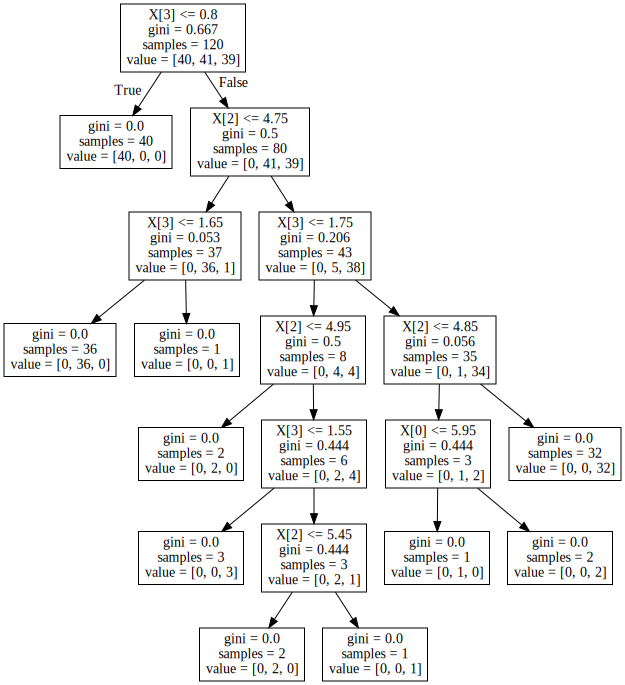

In [11]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)